<a href="https://colab.research.google.com/github/chabhadia-nikhil/Collab_ML/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

In [ ]:
#weight vector and making it to -1 and 1
w=np.random.rand(5)

In [ ]:
#train model
def perceptron_training(X_train,y_train,w):
    y_cal =[]
    mistake = 0
    for i in range (80):
        y_cal .append(np.sign(np.dot(X_train[i,:],w)))
        if y_cal[i]!=y_train[i]:
            w=w+y_train[i]*X_train[i,:]
            w=w/np.linalg.norm(w)
            mistake+=1
    return mistake,w


In [ ]:
# prediciting y
def prediction(X_test,y_test,new_weight):
    wrong=0
    y_predicted=[]
    for i in range(20):
        y_predicted.append(np.sign(np.dot(X_test[i,:],w)))
        print("Predicition y:",y_predicted[i],"Actual y:",y_test[i])
        if y_predicted[i]!=y_test[i]:
            wrong+=1
    return wrong,y_predicted


In [ ]:
# making classification set
X, y = make_classification(n_samples=100, n_features=5,n_classes=2)


In [ ]:
#making y as -1 and 1
y=2*y-1

In [ ]:
#making x in -1 to 1
for i in range(100):
    X[i] = X[i]/np.linalg.norm(X[i])

In [ ]:
#splitting dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
print(X_train)

In [ ]:
#assign data
mistake_in_training,updated_weight = perceptron_training(X_train, y_train, w)
wrong_prediction,predicted_y=prediction(X_test, y_test, updated_weight)

Predicition y: -1.0 Actual y: 1
Predicition y: 1.0 Actual y: -1
Predicition y: -1.0 Actual y: -1
Predicition y: 1.0 Actual y: 1
Predicition y: -1.0 Actual y: 1
Predicition y: -1.0 Actual y: -1
Predicition y: -1.0 Actual y: -1
Predicition y: 1.0 Actual y: 1
Predicition y: -1.0 Actual y: -1
Predicition y: 1.0 Actual y: 1
Predicition y: 1.0 Actual y: 1
Predicition y: -1.0 Actual y: -1
Predicition y: -1.0 Actual y: -1
Predicition y: 1.0 Actual y: 1
Predicition y: -1.0 Actual y: 1
Predicition y: 1.0 Actual y: 1
Predicition y: -1.0 Actual y: -1
Predicition y: -1.0 Actual y: -1
Predicition y: -1.0 Actual y: -1
Predicition y: 1.0 Actual y: 1


In [ ]:
#printing
print("\n")
print("Mistake_in_training: ",mistake_in_training )
print("Updated_weight: ",updated_weight)
print("Wrong_prediction: ",wrong_prediction )
print("Predicted_y: ",predicted_y )



Mistake_in_training:  18
Updated_weight:  [-0.09473023  0.49862397  0.69343819 -0.50832015  0.05616427]
Wrong_prediction:  4
Predicted_y:  [-1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0]


In [ ]:
#ploting graph of all data set
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Plot 1: Overall Data Set
axes[0, 0].scatter(X[:, 0], X[:, 1], c=y, label="Overall data set")
axes[0, 0].set_title("Overall Data Set")
axes[0, 0].set_xlabel("Feature 1")
axes[0, 0].set_ylabel("Feature 2")
axes[0, 0].legend()
# Plot 2: Splitted Data Set
axes[0, 1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='^', edgecolors='black', label="training data set")
axes[0, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='*', edgecolors='green', label="testing data set")
axes[0, 1].set_title("Splitted Data Set")
axes[0, 1].set_xlabel("Feature 1")
axes[0, 1].set_ylabel("Feature 2")
axes[0, 1].legend()
# Plot 3: Splitted Data Set with Predicted Labels
axes[1, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='*', edgecolors='black', label="training data set")
axes[1, 0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='^', edgecolors='red', label="testing data set")
axes[1, 0].scatter(X_test[:, 0], X_test[:, 1], c=predicted_y, marker='o', edgecolors='green', label="predicted data set")
axes[1, 0].set_title("With Predicted DataSet")
axes[1, 0].set_xlabel("Feature 1")
axes[1, 0].set_ylabel("Feature 2")
axes[1, 0].legend()
# Plot 4: Decision Boundary
axes[1, 1].scatter(X[:, 0], X[:, 1], c=y, label="Overall data set")
xmin, xmax = plt.xlim()
ymin, ymax=plt.ylim()
x_range = np.linspace(xmin, xmax, 100)
y_range=np.linspace(ymin, ymax, 100)
Y_dec_boundary =updated_weight[0] * x_range + updated_weight[1] * y_range
axes[1, 1].plot(x_range, Y_dec_boundary, color='red')
axes[1, 1].set_title("Decision Boundary")
axes[1, 1].set_xlabel("Feature 1")
axes[1, 1].set_ylabel("Feature 2")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test,predicted_y)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.95


Confusion Matrix:
[[ 8  1]
 [ 0 11]]


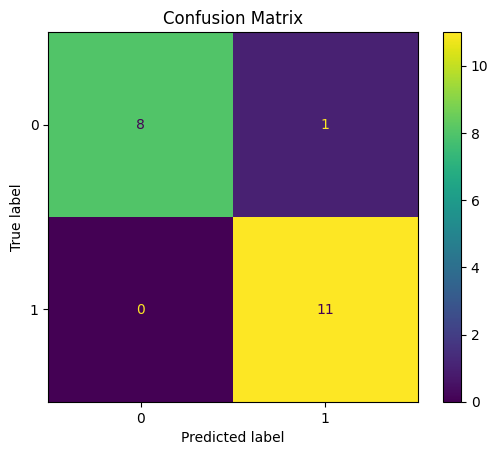

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_y)
print("Confusion Matrix:")
print(conf_matrix)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title("Confusion Matrix")
plt.show()